<a href="https://colab.research.google.com/github/suhrobm/Methods-and-Models-for-Multivariate-Data-Analysis/blob/main/Lab1_Suhrob_Munavarov_J4134c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1. ANALYSIS OF UNIVARIATE RANDOM VARIABLES

---


### Content 🎯



1.   Substantiation of Chosen Subsample
2.   Plotting a Non Parametric Estimation of PDF in Form of a Histogram and Using Kernel Density Function
3.   Order Statistics Estimation and Its Representation as Box with Whiskers Plot
4.   Selection of Theoretical Distributions That Best Reflect Empirical Data
5.   Estimation of Random Variable Distribution Parameters Using Maximum Likelihood Technique and LS Methods
6.   Validation of Empirical and Theoretical Distributions Using Quantile Biplots
7.   Statistical Tests

# **About Dataset**

**Context**

Housing price of Beijing from 2011 to 2017, fetching from Lianjia.com

**Content**

It includes URL, ID, Lng, Lat, CommunityID, TradeTime, DOM (days on market), Followers, Total price, Price, Square, Living Room, number of Drawing room, Kitchen and Bathroom, Building Type, Construction time. renovation condition, building structure, Ladder ratio (which is the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average), elevator, Property rights for five years（It's related to China restricted purchase of houses policy), Subway, District, Community average price.

Most data is traded in 2011-2017, some of them is traded in Jan, 2018, and some is even earlier (2010,2009).

All the data was fetching from https://bj.lianjia.com/chengjiao.

**Acknowledgements**

All the data was fetching from Lianjia.

**Inspiration**

It may help you predict the housing price of Beijing.

#  **About this file:** 

**url:** the url which fetches the data

**id:** the id of transaction

**Lng:** and Lat coordinates, using the BD09 protocol

**Cid:** community id

**tradeTime:** the time of transaction

**DOM:** active days on market. Know more in https://en.wikipedia.org/wiki/Days_on_market

**followers:** the number of people follow the transaction

**totalPrice:** the total price

**price:** the average price by square

**square:** the square of house

**livingRoom:** the number of living room

**drawingRoom:** the number of drawing room

**kitchen:** the number of kitchen

**bathroom:** the number of bathroom

**floor:** the height of the house. I will turn the Chinese characters to English in the next version

**buildingType:** including tower (1), bungalow (2), combination of plate and tower (3), plate (4)

**constructionTime:** the time of construction

**renovationCondition:** including other (1), rough (2), Simplicity (3), hardcover (4)

**buildingStructure:** including unknow (1), mixed (2), brick and wood (3), brick and concrete (4), steel (5) and steel-concrete composite (6)

**ladderRatio:** the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average elevator have (1) or not have elevator (0)

**fiveYearsProperty:** if the owner have the property for less than 5 years

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.optimize
import warnings
from google.colab import drive
drive.mount('/content/drive')

# prevents numpy scientific/exponential notation on print, default is False
# force-suppressing the scientific notation, it is rounded and justified
np.set_printoptions(suppress=False, formatter={'float_kind':'{:0.2f}'.format})
# ignoring warnings
warnings.filterwarnings(action='ignore')

Mounted at /content/drive


### 1. Substantiation of Chosen Subsample

In [2]:
# Reading whole dataset from file 
df = pd.read_csv('/content/drive/MyDrive/MMMDA/Housing price in Beijing.csv', encoding = 'ISO-8859-1')
print(df.shape)
df.head(3)

(318851, 26)


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0


The following variables were selected for the further implementations: 

**'Lng', 'Lat', 'price', 'square'**. 

The main reason of selecting mentioned features is because of the sufficient smoothness of their distributions and the absence of outliers.

In [3]:
# Creating subsamples, choosing four continous colomns for further implementations
df = df[['Lng', 'Lat', 'price', 'square']]
print(df.shape)
df.head()

(318851, 4)


,Lng,Lat,price,square
0,116.475489,40.019520,31680,131.00
1,116.453917,39.881534,43436,132.38
2,116.561978,39.877145,52021,198.00
3,116.438010,40.076114,22202,134.00
4,116.428392,39.886229,48396,81.00


### 2. Plotting a Non Parametric Estimation of PDF in Form of a Histogram and Using Kernel Density Function

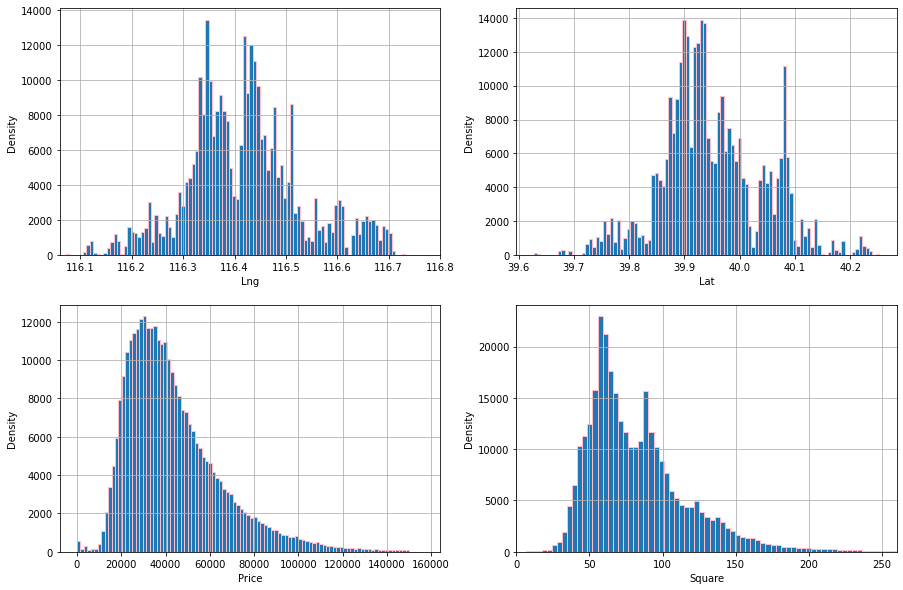

In [4]:
# non-parametric estimation of PDF in form of histogram, each variable plotted next to each other

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

plt.subplot(221)
plt.hist(df.Lng, bins=100, ec='pink')
plt.xlim(116.06, 116.8)
plt.grid(True)
plt.xlabel('Lng')
plt.ylabel('Density')

plt.subplot(222)
plt.hist(df.Lat, bins=100, ec='pink')
plt.grid(True)
plt.xlabel('Lat')
plt.ylabel('Density')

plt.subplot(223)
plt.hist(df.price, bins=100, ec='pink')
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Density')

plt.subplot(224)
plt.hist(df.square, bins=500, ec='pink')
plt.xlim(0, 260)
plt.grid(True)
plt.xlabel('Square')
plt.ylabel('Density')

plt.show()

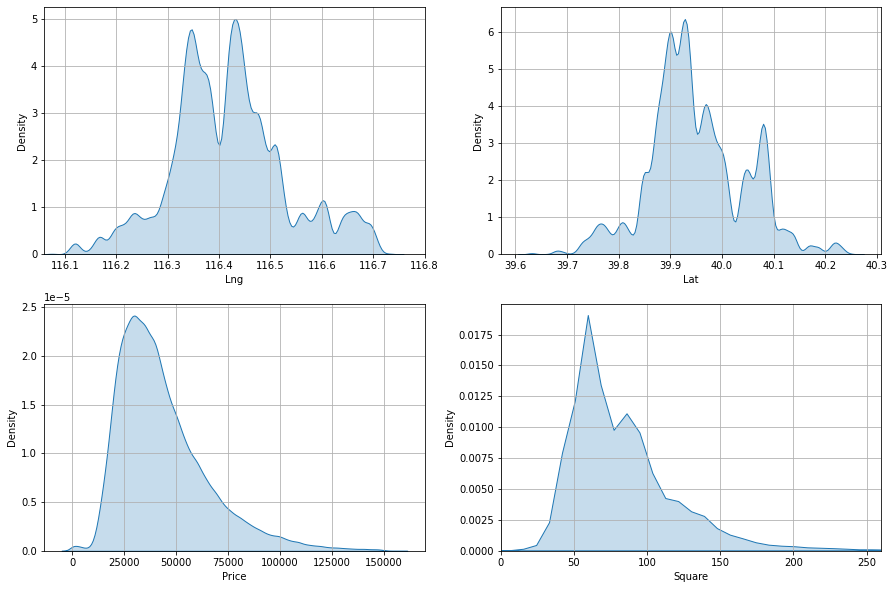

In [5]:
# non-parametric estimation of PDF using kernel density function, each variable plotted next to each other
# we can get a smooth distribution estimate using the kernel density estimate that Seaborn does with kdeplot function

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

plt.subplot(221)
sns.kdeplot(df.Lng, shade=True)
plt.xlim(116.06, 116.8)
plt.grid(True)
plt.xlabel('Lng')
plt.ylabel('Density')

plt.subplot(222)
sns.kdeplot(df.Lat, shade=True)
plt.grid(True)
plt.xlabel('Lat')
plt.ylabel('Density')

plt.subplot(223)
sns.kdeplot(df.price, shade=True)
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Density')

plt.subplot(224)
sns.kdeplot(df.square, shade=True)
plt.xlim(0, 260)
plt.grid(True)
plt.xlabel('Square')
plt.ylabel('Density')

plt.show()

### 3. Order Statistics Estimation and Its Representation as Box with Whiskers Plot

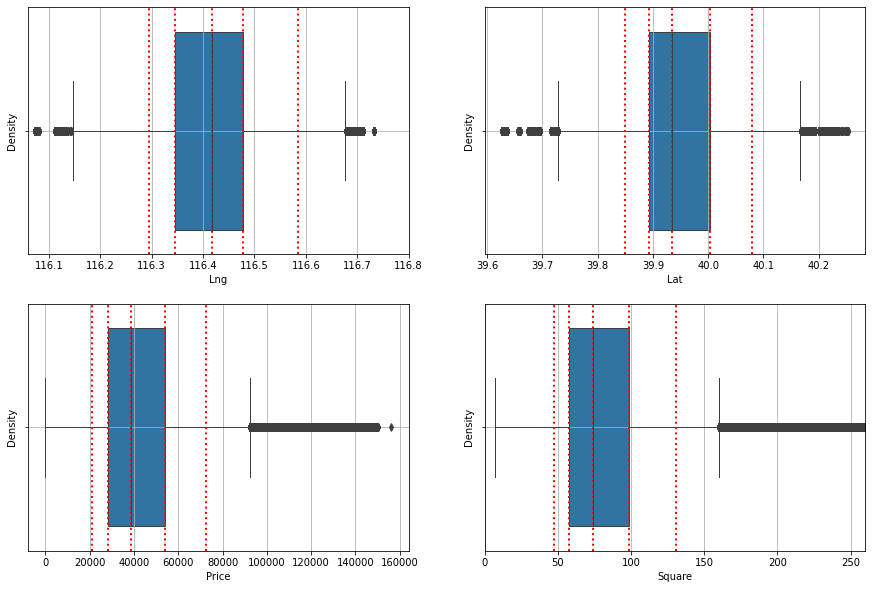

In [6]:
# finding quantiles of each variable
def quantiles(arr):
    return np.array([np.quantile(arr, 0.1), np.quantile(arr, 0.25), np.quantile(arr, 0.5), np.quantile(arr, 0.75), np.quantile(arr, 0.9)
                    ])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

plt.subplot(221)
sns.boxplot(df.Lng, linewidth=1)
plt.xlim(116.06, 116.8)
result = quantiles(df.Lng)
for _ in result:
  plt.axvline(_, color='red', linestyle=':', lw=2)
plt.grid(True)
plt.xlabel('Lng')
plt.ylabel('Density')

plt.subplot(222)
sns.boxplot(df.Lat, linewidth=1)
result = quantiles(df.Lat)
for _ in result:
  plt.axvline(_, color='red', linestyle=':', lw=2)
plt.grid(True)
plt.xlabel('Lat')
plt.ylabel('Density')

plt.subplot(223)
sns.boxplot(df.price, linewidth=1)
result = quantiles(df.price)
for _ in result:
  plt.axvline(_, color='red', linestyle=':', lw=2)
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Density')

plt.subplot(224)
sns.boxplot(df.square, linewidth=1)
result = quantiles(df.square)
for _ in result:
  plt.axvline(_, color='red', linestyle=':', lw=2)
plt.xlim(0, 260)
plt.grid(True)
plt.xlabel('Square')
plt.ylabel('Density')

plt.show()

In [7]:
print(f'Printing order statistics Estimation for Lng variable.\n')
print(quantiles(df[['Lng']]))
print(df[['Lng']].describe())
print()
print(f'Printing order statistics Estimation for Lat variable.\n')
print(quantiles(df['Lat']))
print(df['Lat'].describe())
print()
print(f'Printing order statistics Estimation for Price variable.\n')
print(quantiles(df['price']))
print(df['price'].describe())
print()
print(f'Printing order statistics Estimation for Square variable.\n')
print(quantiles(df['square']))
print(df['square'].describe())
print()


Printing order statistics Estimation for Lng variable.

[116.29 116.34 116.42 116.48 116.58]
                 Lng
count  318851.000000
mean      116.418459
std         0.112054
min       116.072514
25%       116.344985
50%       116.416780
75%       116.477581
max       116.732378

Printing order statistics Estimation for Lat variable.

[39.85 39.89 39.93 40.00 40.08]
count    318851.000000
mean         39.949591
std           0.091983
min          39.627030
25%          39.893200
50%          39.934527
75%          40.003018
max          40.252758
Name: Lat, dtype: float64

Printing order statistics Estimation for Price variable.

[21222.00 28050.00 38737.00 53819.50 72688.00]
count    318851.000000
mean      43530.436379
std       21709.024204
min           1.000000
25%       28050.000000
50%       38737.000000
75%       53819.500000
max      156250.000000
Name: price, dtype: float64

Printing order statistics Estimation for Square variable.

[47.11 57.90 74.26 98.71 130.46]
count   


### 4. Selection of Theoretical Distributions That Best Reflect Empirical Data

Choosing an apropriate distribution type to fit our data.


Distribution norm_gen arguments: (116.41845944859571, 0.11205412619510137)
Distribution logistic_gen arguments: (116.41406436969007, 0.062381914562409546)
Distribution gamma_gen arguments: (64.13881255378237, 115.52218684981875, 0.013973950469161282)
Distribution laplace_gen arguments: (116.41678, 0.08645133544570993)
Distribution beta_gen arguments: (64.13877568174404, 221708861.6972574, 115.52218704369787, 3098150.597015819)


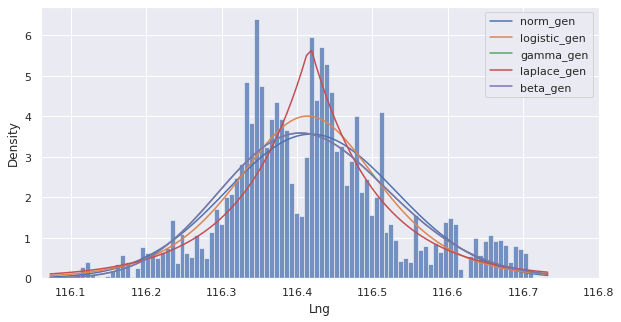

Distribution norm_gen arguments: (39.94959061016632, 0.09198240302047508)
Distribution logistic_gen arguments: (39.945937801507945, 0.05168536502114922)
Distribution gamma_gen arguments: (106.88863917568048, 38.99941362006312, 0.008889410554375116)
Distribution laplace_gen arguments: (39.934527, 0.07100489012378827)
Distribution beta_gen arguments: (105.81152221378608, 50323763.036723085, 39.00419232267495, 449630.99865165027)


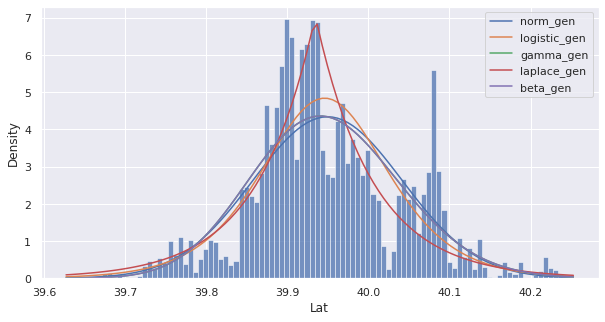

Distribution norm_gen arguments: (43530.43637937469, 21708.99016098266)
Distribution logistic_gen arguments: (40996.00454644119, 11587.099164194966)
Distribution gamma_gen arguments: (15.258240431416553, -30497.99615203333, 4812.042632890458)
Distribution laplace_gen arguments: (38737.0, 16058.795340143202)
Distribution beta_gen arguments: (4.775618162134162, 12502910118.173275, -1802.4650465646, 118831792861927.61)


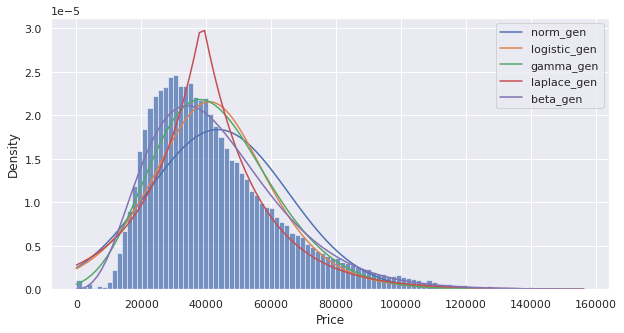

Distribution norm_gen arguments: (83.24059670504404, 37.23460249124509)
Distribution logistic_gen arguments: (78.73005611981417, 19.011835919055994)
Distribution gamma_gen arguments: (0.07032826852197951, 6.8999999999999995, 3.3454722296995696)
Distribution laplace_gen arguments: (74.26, 26.609066930948938)
Distribution beta_gen arguments: (5.072171830235968, 4728797.026375677, 6.876902820231628, 71303432.52775112)


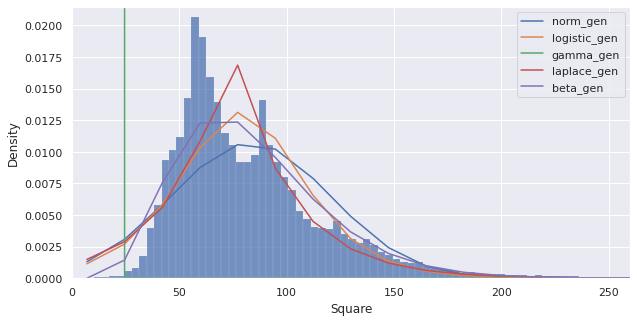

In [8]:
def dist_plots(arr):
  for _ in ([ss.norm, ss.logistic, ss.gamma, ss.laplace, ss.beta]):
    x_plot = np.linspace(np.min(arr), np.max(arr), 100)
    args = _.fit(arr)
    print('Distribution', type(_).__name__, 'arguments:', args)
    y_plot = _.pdf(x_plot, *args)
    sns.lineplot(x_plot, y_plot, label=type(_).__name__)

sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(df.Lng, bins=100, stat='density')
dist_plots(df.Lng)
plt.xlim(116.06, 116.8)
plt.legend()
plt.grid(True)
plt.xlabel('Lng')
plt.ylabel('Density')
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(df.Lat, bins=100, stat='density')
dist_plots(df.Lat)
plt.legend()
plt.grid(True)
plt.xlabel('Lat')
plt.ylabel('Density')
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(df.price, bins=100, stat='density')
dist_plots(df.price)
plt.legend()
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

sns.set(rc={'figure.figsize':(10,5)})     
sns.histplot(df.square, bins=500, stat='density')
dist_plots(df.square)
plt.ylim(0, 0.0215)
plt.xlim(0, 260)
plt.legend()
plt.grid(True)
plt.xlabel('Square')
plt.ylabel('Density')
plt.show()

### 5. Estimation of Random Variable Distribution Parameters Using Maximum Likelihood Technique and Least Square Methods

In [22]:
mle_fit = ss.logistic.fit(df.Lng, method = 'MLE')

print('Distribution', type(ss.logistic).__name__, 'arguments:', mle_fit)

def function(x, a, b):
    return getattr(ss.distributions, 'logistic').pdf(x, a, b)

x, y = np.histogram(df.Lng, bins=10, density=True)
ls, _ = scipy.optimize.curve_fit(f = function, xdata = x[:10], ydata = y[:10], method = 'lm', maxfev=100000)

print('Maximum Likelihood Estimation: {:.3f}, {:.3f}'.format(mle_fit[0], mle_fit[1]))
print('Least Square Method: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

Distribution logistic_gen arguments: (116.41406436969007, 0.062381914562409546)
Maximum Likelihood Estimation: 116.414, 0.062
Least Square Method: 0.761, 0.002


In [10]:
mle_fit = ss.laplace.fit(df.Lat, method = 'MLE')

print('Distribution', type(ss.laplace).__name__, 'arguments:', mle_fit)

def function(x, a, b):
    return getattr(ss.distributions, 'laplace').pdf(x, a, b)

x, y = np.histogram(df.Lat, bins=10, density=True)
ls, _ = scipy.optimize.curve_fit(f = function, xdata = x[:10], ydata = y[:10], method = 'lm', maxfev=100000)

print('Maximum Likelihood Estimation: {:.3f}, {:.3f}'.format(mle_fit[0], mle_fit[1]))
print('Least Square Method: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

Distribution laplace_gen arguments: (39.934527, 0.07100489012378827)
Maximum Likelihood Estimation: 39.935, 0.071
Least Square Method: 0.292, 0.013


In [11]:
mle_fit = ss.beta.fit(df.price, method = 'MLE')

print('Distribution', type(ss.beta).__name__, 'arguments:', mle_fit)

def function(x, a, b):
    return getattr(ss.distributions, 'beta').pdf(x, a, b)

x, y = np.histogram(df.price, bins=10, density=True)
ls, _ = scipy.optimize.curve_fit(f = function, xdata = x[:10], ydata = y[:10], method = 'lm', maxfev=100000)

print('Maximum Likelihood Estimation: {:.3f}, {:.3f}'.format(mle_fit[0], mle_fit[1]))
print('Least Square Method: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

Distribution beta_gen arguments: (4.775618162134162, 12502910118.173275, -1802.4650465646, 118831792861927.61)
Maximum Likelihood Estimation: 4.776, 12502910118.173
Least Square Method: 0.773, 52681.200


In [12]:
mle_fit = ss.beta.fit(df.square, method = 'MLE')

print('Distribution', type(ss.beta).__name__, 'arguments:', mle_fit)

def function(x, a, b):
    return getattr(ss.distributions, 'beta').pdf(x, a, b)

x, y = np.histogram(df.square, bins=10, density=True)
ls, _ = scipy.optimize.curve_fit(f = function, xdata = x[:10], ydata = y[:10], method = 'lm', maxfev=100000)

print('Maximum Likelihood Estimation: {:.3f}, {:.3f}'.format(mle_fit[0], mle_fit[1]))
print('Least Square Method: {:.3f}, {:.3f}'.format(ls[0], ls[1]))

Distribution beta_gen arguments: (5.072171830235968, 4728797.026375677, 6.876902820231628, 71303432.52775112)
Maximum Likelihood Estimation: 5.072, 4728797.026
Least Square Method: 1.000, 1.000


### 6. Validation of Empirical and Theoretical Distributions Using Quantile Biplots

Distribution logistic_gen arguments: (116.41406436969007, 0.062381914562409546)


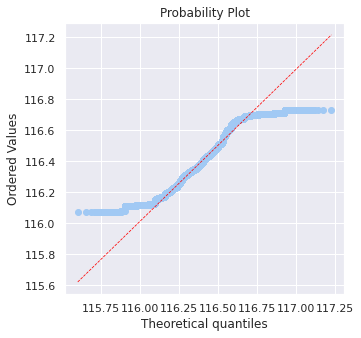

In [13]:
# for Lng varible  
figure, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.set_theme(style='whitegrid', palette='pastel')

args = ss.logistic.fit(df.Lng)

print('Distribution', type(ss.logistic).__name__, 'arguments:', args)

ss.probplot(df.Lng, dist=ss.logistic, sparams=(args), plot=ax)

ax.get_lines()[0].set_marker('o')
ax.get_lines()[1].set_ls('--')
ax.get_lines()[1].set_color('red')
ax.get_lines()[1].set_linewidth(0.75)

plt.show()



Distribution laplace_gen arguments: (39.934527, 0.07100489012378827)


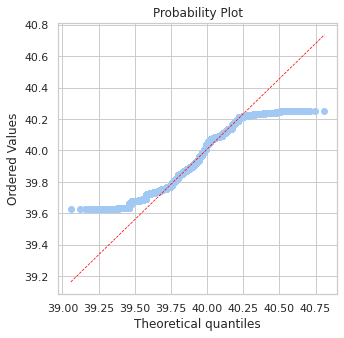

In [14]:
# for Lat varible  
figure, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.set_theme(style='whitegrid', palette='pastel')

args = ss.laplace.fit(df.Lat)

print('Distribution', type(ss.laplace).__name__, 'arguments:', args)

ss.probplot(df.Lat, dist=ss.laplace, sparams=(args), plot=ax)

ax.get_lines()[0].set_marker('o')
ax.get_lines()[1].set_ls('--')
ax.get_lines()[1].set_color('red')
ax.get_lines()[1].set_linewidth(0.75)

plt.show()

Distribution beta_gen arguments: (4.775618162134162, 12502910118.173275, -1802.4650465646, 118831792861927.61)


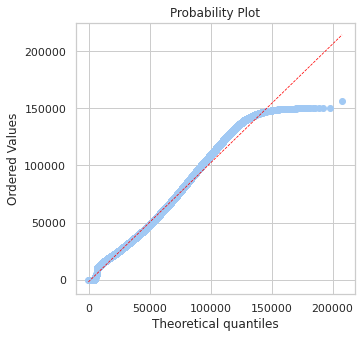

In [15]:
# for Price varible  
figure, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.set_theme(style='whitegrid', palette='pastel')

args = ss.beta.fit(df.price)

print('Distribution', type(ss.beta).__name__, 'arguments:', args)

ss.probplot(df.price, dist=ss.beta, sparams=(args), plot=ax)

ax.get_lines()[0].set_marker('o')
ax.get_lines()[1].set_ls('--')
ax.get_lines()[1].set_color('red')
ax.get_lines()[1].set_linewidth(0.75)

plt.show()

Distribution beta_gen arguments: (5.072171830235968, 4728797.026375677, 6.876902820231628, 71303432.52775112)


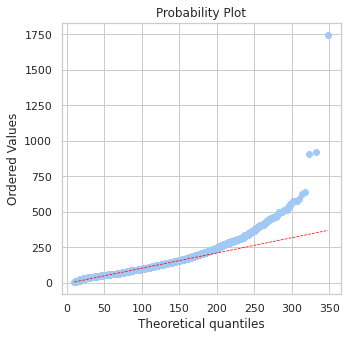

In [16]:
# for Square varible  
figure, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.set_theme(style='whitegrid', palette='pastel')

args = ss.beta.fit(df.square)

print('Distribution', type(ss.beta).__name__, 'arguments:', args)

ss.probplot(df.square, dist=ss.beta, sparams=(args), plot=ax)

ax.get_lines()[0].set_marker('o')
ax.get_lines()[1].set_ls('--')
ax.get_lines()[1].set_color('red')
ax.get_lines()[1].set_linewidth(0.75)

plt.show()

### 7. Statistical Tests

In [17]:
# For Lng variable

args = ss.logistic.fit(df.Lng)


kstest_pval = ss.kstest(df.Lng, cdf='logistic', args=args).pvalue
kstest_stat = ss.kstest(df.Lng, cdf='logistic', args=args).statistic
cramervonmises_pval = ss.cramervonmises(df.Lng, cdf='logistic', args=args).pvalue
cramervonmises_stat = ss.cramervonmises(df.Lng, cdf='logistic', args=args).statistic

print('Kolmogorov-Smirnov Test(pvalue): {:.12f}'.format(kstest_pval))
print('Kolmogorov-Smirnov Test(statistic): {:.12f}'.format(kstest_stat))
print('Cramer–Von Mises Test(pvalue): {:.12f}'.format(cramervonmises_pval))
print('Cramer–Von Mises Test(statistic): {:.12f}'.format(cramervonmises_stat))


Kolmogorov-Smirnov Test(pvalue): 0.000000000000
Kolmogorov-Smirnov Test(statistic): 0.039980209512
Cramer–Von Mises Test(pvalue): 0.000000030883
Cramer–Von Mises Test(statistic): 126.110486942527


In [18]:
# For Lat variable

args = ss.laplace.fit(df.Lat)


kstest_pval = ss.kstest(df.Lat, cdf='laplace', args=args).pvalue
kstest_stat = ss.kstest(df.Lat, cdf='laplace', args=args).statistic
cramervonmises_pval = ss.cramervonmises(df.Lat, cdf='laplace', args=args).pvalue
cramervonmises_stat = ss.cramervonmises(df.Lat, cdf='laplace', args=args).statistic

print('Kolmogorov-Smirnov Test(pvalue): {:.12f}'.format(kstest_pval))
print('Kolmogorov-Smirnov Test(statistic): {:.12f}'.format(kstest_stat))
print('Cramer–Von Mises Test(pvalue): {:.12f}'.format(cramervonmises_pval))
print('Cramer–Von Mises Test(statistic): {:.12f}'.format(cramervonmises_stat))

Kolmogorov-Smirnov Test(pvalue): 0.000000000000
Kolmogorov-Smirnov Test(statistic): 0.088957477534
Cramer–Von Mises Test(pvalue): 0.000000136742
Cramer–Von Mises Test(statistic): 567.572759345628


In [19]:
# For Price variable

args = ss.beta.fit(df.price)

kstest_pval = ss.kstest(df.price, cdf='beta', args=args).pvalue
kstest_stat = ss.kstest(df.price, cdf='beta', args=args).statistic
cramervonmises_pval = ss.cramervonmises(df.price, cdf='beta', args=args).pvalue
cramervonmises_stat = ss.cramervonmises(df.price, cdf='beta', args=args).statistic

print('Kolmogorov-Smirnov Test(pvalue): {:.12f}'.format(kstest_pval))
print('Kolmogorov-Smirnov Test(statistic): {:.12f}'.format(kstest_stat))
print('Cramer–Von Mises Test(pvalue): {:.12f}'.format(cramervonmises_pval))
print('Cramer–Von Mises Test(statistic): {:.12f}'.format(cramervonmises_stat))

Kolmogorov-Smirnov Test(pvalue): 0.000000000000
Kolmogorov-Smirnov Test(statistic): 0.039462759881
Cramer–Von Mises Test(pvalue): 0.000000044425
Cramer–Von Mises Test(statistic): 178.254032429469


In [20]:
# For Square variable

args = ss.beta.fit(df.square)

kstest_pval = ss.kstest(df.square, cdf='beta', args=args).pvalue
kstest_stat = ss.kstest(df.square, cdf='beta', args=args).statistic
cramervonmises_pval = ss.cramervonmises(df.square, cdf='beta', args=args).pvalue
cramervonmises_stat = ss.cramervonmises(df.square, cdf='beta', args=args).statistic

print('Kolmogorov-Smirnov Test(pvalue): {:.12f}'.format(kstest_pval))
print('Kolmogorov-Smirnov Test(statistic): {:.12f}'.format(kstest_stat))
print('Cramer–Von Mises Test(pvalue): {:.12f}'.format(cramervonmises_pval))
print('Cramer–Von Mises Test(statistic): {:.12f}'.format(cramervonmises_stat))

Kolmogorov-Smirnov Test(pvalue): 0.000000000000
Kolmogorov-Smirnov Test(statistic): 0.058397877507
Cramer–Von Mises Test(pvalue): 0.000000110509
Cramer–Von Mises Test(statistic): 320.507230217760
